      support                                           itemsets
0        0.01                                     (AhmedLSayed9)
1        0.01                                    (BananaMasterz)
2        0.01                                            (Hixie)
3        0.01                                          (Jaxonce)
4        0.01                                          (Karjan1)
...       ...                                                ...
9447     0.01  (a: animation, framework, tool, f: material de...
9448     0.01  (team-android, engine, has reproducible steps,...
9449     0.01  (polina-c, tool, framework, has reproducible s...
9450     0.01  (BananaMasterz, triaged-text-input, framework,...
9451     0.01  (a: animation, a: accessibility, framework, f:...

[9452 rows x 2 columns]
                      antecedents  \
0                            (P3)   
1                  (AhmedLSayed9)   
2                  (AhmedLSayed9)   
3                  (AhmedLSayed9)   
4         

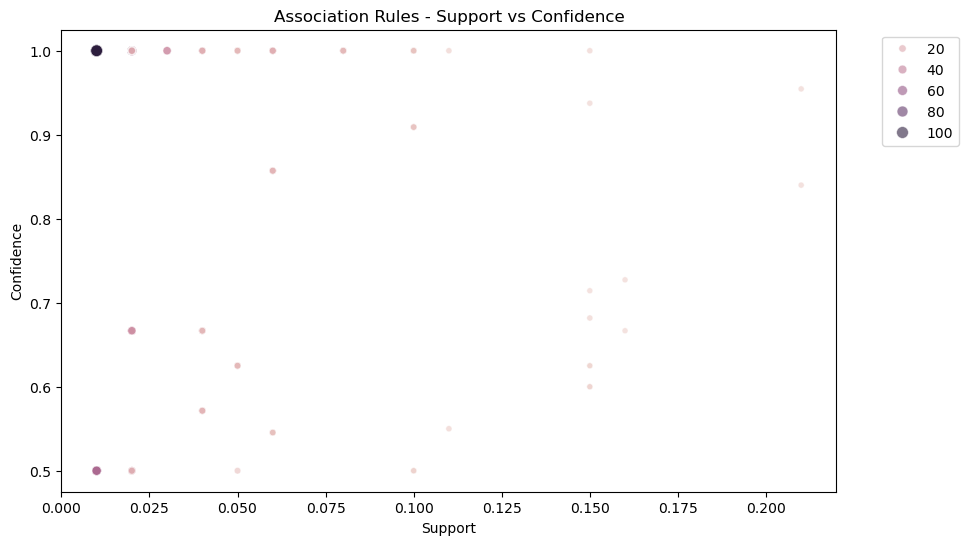

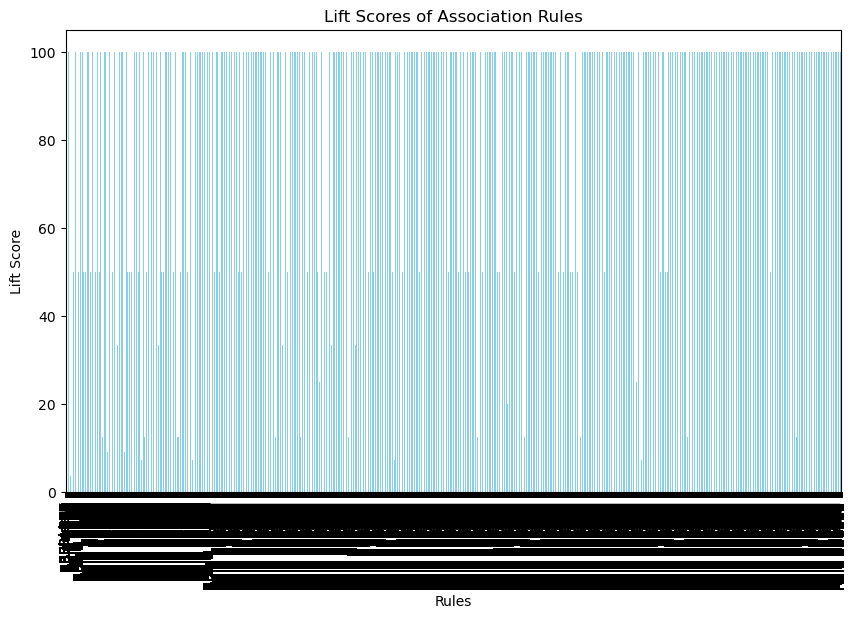

In [1]:
#!pip install mlxtend

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Load JSON data
with open('specific_flutter_100issues.json', 'r') as file:
    data = json.load(file)

# Preprocess data
transactions = []
for issue in data:
    items = {label['name'] for label in issue.get('labels', [])}  # Safely get all labels
    items.add(issue.get('user', {}).get('login', 'unknown'))  # Safely add author as an item
    transactions.append(list(items))

# Transform transactions into DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Print frequent itemsets
print(frequent_itemsets)

# Generate and print association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])



# Scatter plot for support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, size="lift", alpha=0.6, hue="lift")
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
# Plotting lift scores
plt.figure(figsize=(10, 6))
rules['lift'].plot(kind='bar', color='skyblue')
plt.title('Lift Scores of Association Rules')
plt.xlabel('Rules')
plt.ylabel('Lift Score')
plt.xticks(range(len(rules)), ['Rule {}'.format(i+1) for i in range(len(rules))], rotation=90)

plt.show()

